In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'])
df.set_index('Month', inplace=True)
ts = df['Passengers']

ts.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


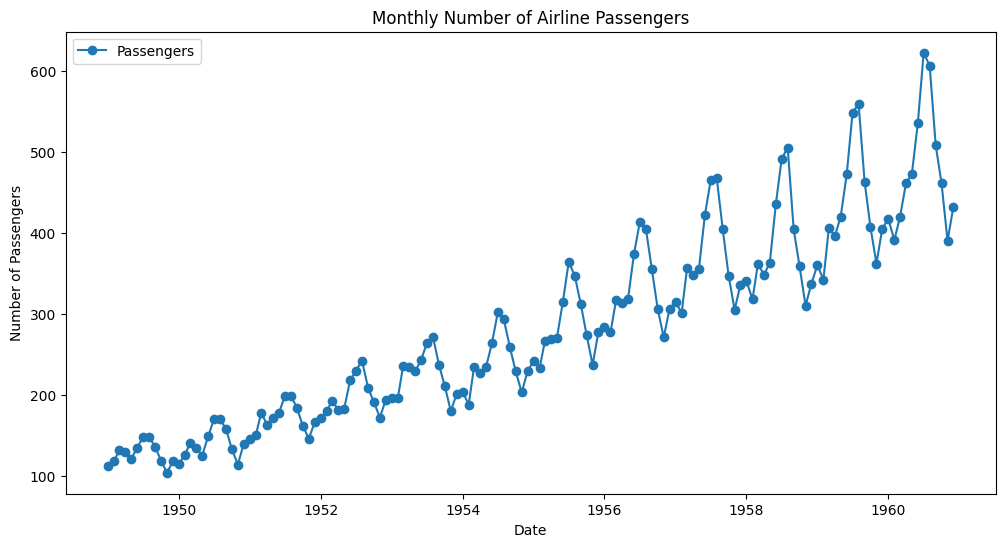

In [3]:
plt.figure(figsize=(12,6))
plt.plot(ts, marker='o', linestyle='-', label='Passengers')
plt.title('Monthly Number of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


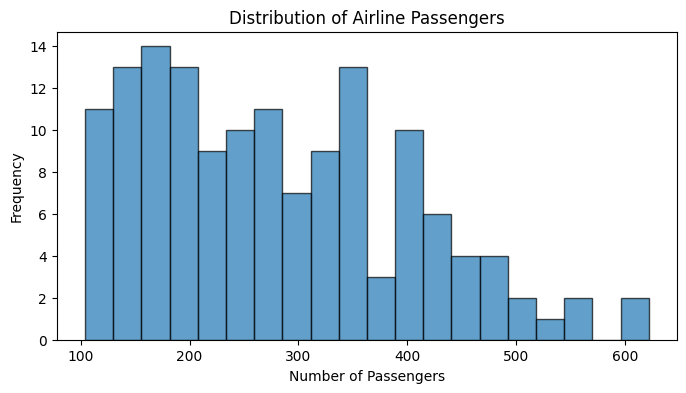

In [4]:
plt.figure(figsize=(8,4))
plt.hist(ts, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

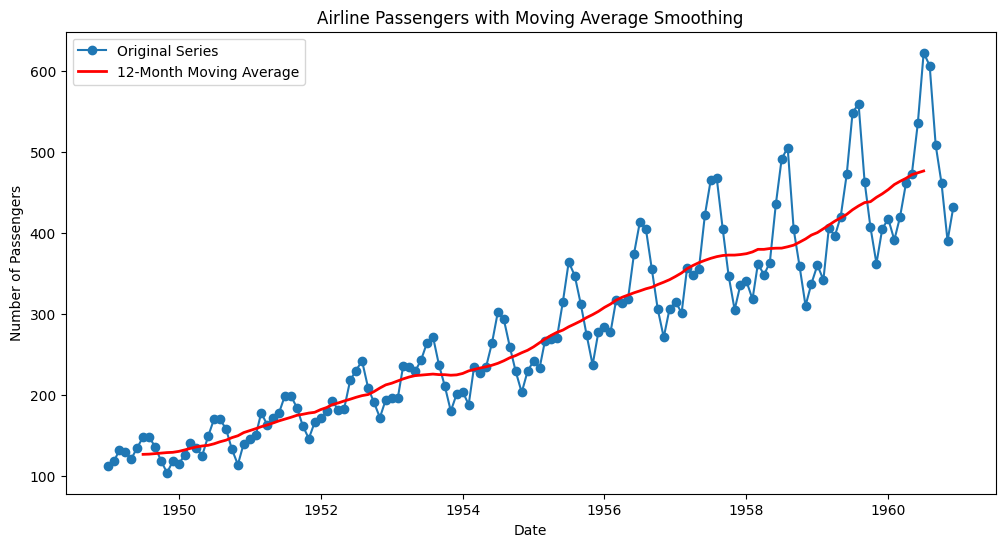

In [5]:
window_size = 12
ma_smoothed = ts.rolling(window=window_size, center=True).mean()

plt.figure(figsize=(12,6))
plt.plot(ts, marker='o', linestyle='-', label='Original Series')
plt.plot(ma_smoothed, color='red', linewidth=2, label='12-Month Moving Average')
plt.title('Airline Passengers with Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

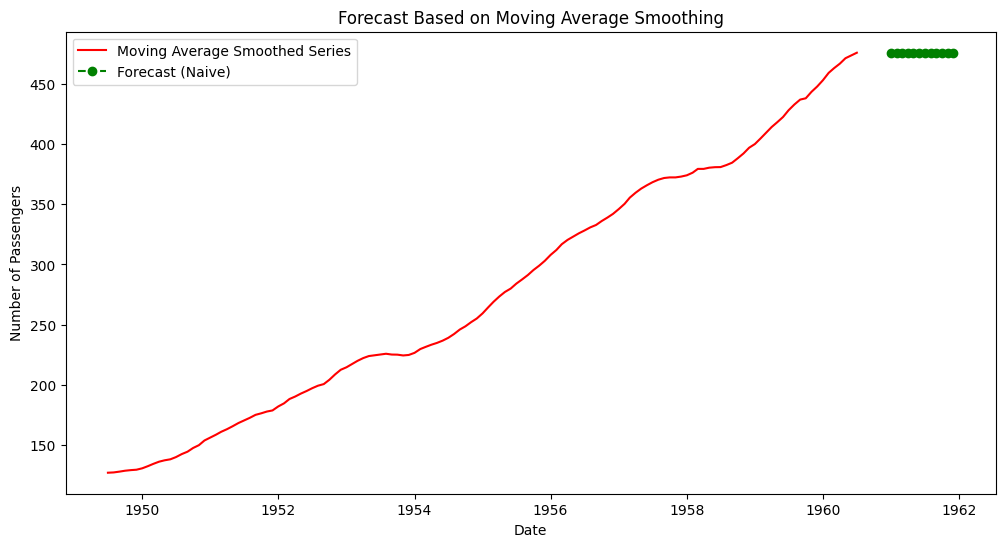

In [7]:
last_smoothed_value = ma_smoothed.dropna().iloc[-1]

forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast = pd.Series([last_smoothed_value]*12, index=forecast_index)

plt.figure(figsize=(12,6))
plt.plot(ma_smoothed, color='red', label='Moving Average Smoothed Series')
plt.plot(forecast, color='green', linestyle='--', marker='o', label='Forecast (Naive)')
plt.title('Forecast Based on Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


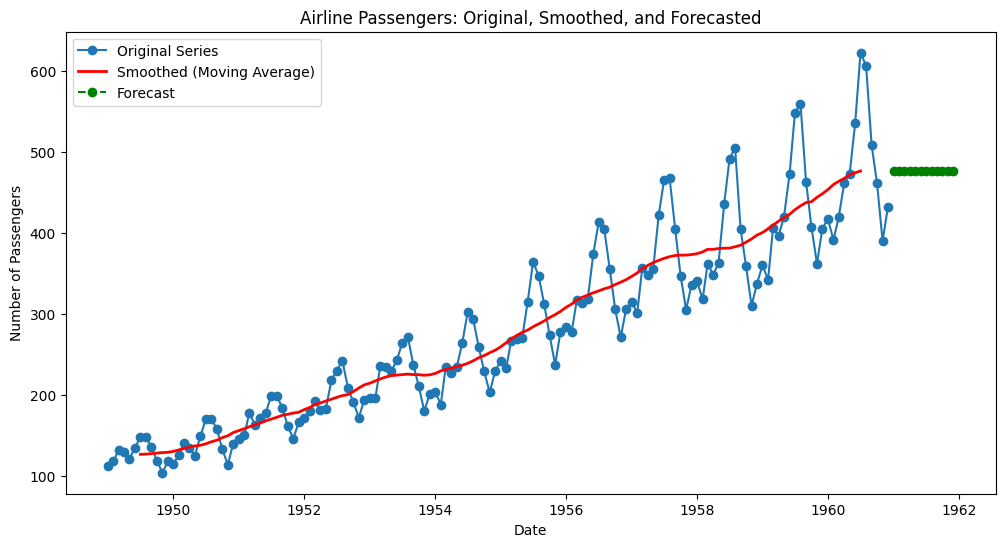

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ts, marker='o', linestyle='-', label='Original Series')
plt.plot(ma_smoothed, color='red', linewidth=2, label='Smoothed (Moving Average)')
plt.plot(forecast, color='green', linestyle='--', marker='o', label='Forecast')
plt.title('Airline Passengers: Original, Smoothed, and Forecasted')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()